## 1. Importing Required Libraries

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np
import os

# Visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Settings
import warnings
warnings.filterwarnings('ignore')

# ── Dashboard-Ready Pastel Colour Palette ──
PASTEL_BLUE  = '#7EB6D9'   # No Churn
PASTEL_RED   = '#E8889D'   # Yes Churn
PASTEL_NAVY  = '#5B8FA8'   # Accent / darker blue
PASTEL_ROSE  = '#D4607A'   # Accent / darker red

# Extended palette for multi-model charts
MODEL_PALETTE = [
    '#7EB6D9',  # soft blue
    '#E8889D',  # soft red
    '#9DC8E8',  # light sky
    '#F2A7B8',  # light rose
    '#5B8FA8',  # teal-blue
    '#D4607A',  # dark rose
    '#B8D4E8',  # pastel sky
]

CHURN_PALETTE = {'No': PASTEL_BLUE, 'Yes': PASTEL_RED}
CHURN_PALETTE_BINARY = {0: PASTEL_BLUE, 1: PASTEL_RED}

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette(MODEL_PALETTE)
plt.rcParams.update({
    'figure.facecolor': '#FAFAFA',
    'axes.facecolor':   '#FAFAFA',
    'font.family':      'sans-serif',
    'axes.edgecolor':   '#CCCCCC',
    'grid.color':       '#E8E8E8',
})

# Random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

print('All libraries loaded successfully.')
print(f'TensorFlow version: {tf.__version__}')

All libraries loaded successfully.
TensorFlow version: 2.19.0


## 2. Loading Data

In [ ]:
# Load dataset
df = pd.read_csv('./sample_data/churn.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (7043, 21)

First few rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Dataset info
print("Dataset Information:")
df.info()

print("\nMissing values:")
print(df.isnull().sum())

print("\nChurn distribution:")
print(df['Churn'].value_counts())
print(f"\nChurn rate: {df['Churn'].value_counts(normalize=True)['Yes']:.2%}")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

## 3. Exploratory Data Analysis

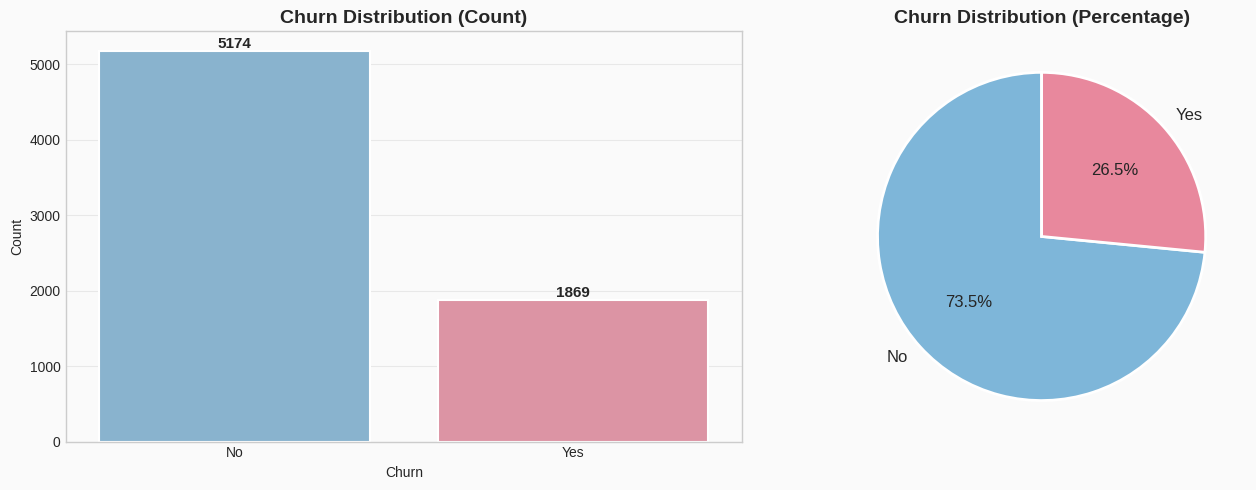

In [ ]:
# Churn distribution visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='Churn', palette=CHURN_PALETTE, ax=axes[0],
              edgecolor='white', linewidth=1.5)
axes[0].set_title('Churn Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', fontsize=11, fontweight='bold')

# Pie chart
churn_counts = df['Churn'].value_counts()
axes[1].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%',
            startangle=90, colors=[PASTEL_BLUE, PASTEL_RED],
            wedgeprops={'edgecolor': 'white', 'linewidth': 2},
            textprops={'fontsize': 12})
axes[1].set_title('Churn Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

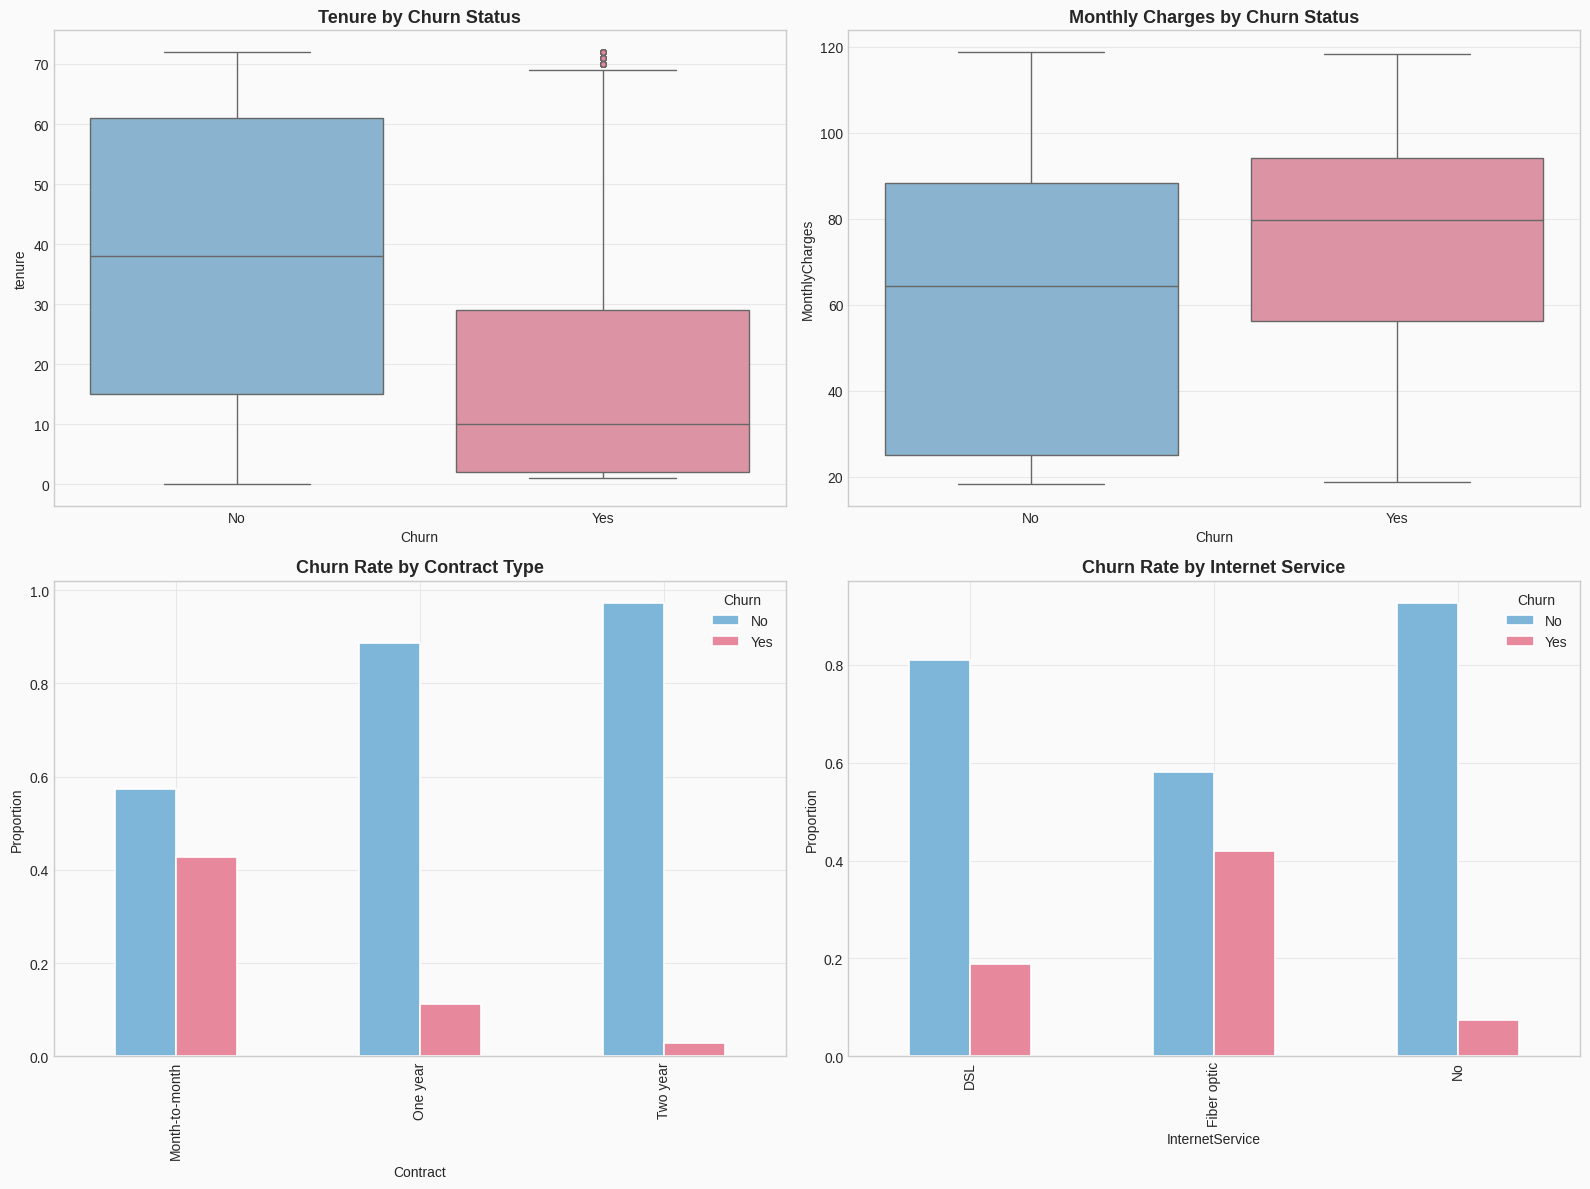

In [ ]:
# Analyze key features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Tenure vs Churn
sns.boxplot(data=df, x='Churn', y='tenure', palette=CHURN_PALETTE, ax=axes[0, 0],
            flierprops={'markerfacecolor': PASTEL_RED, 'markersize': 4})
axes[0, 0].set_title('Tenure by Churn Status', fontsize=13, fontweight='bold')

# Monthly Charges vs Churn
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette=CHURN_PALETTE, ax=axes[0, 1],
            flierprops={'markerfacecolor': PASTEL_RED, 'markersize': 4})
axes[0, 1].set_title('Monthly Charges by Churn Status', fontsize=13, fontweight='bold')

# Contract Type vs Churn
ct_contract = pd.crosstab(df['Contract'], df['Churn'], normalize='index')
ct_contract.plot(kind='bar', color=[PASTEL_BLUE, PASTEL_RED], ax=axes[1, 0],
                 edgecolor='white', linewidth=1.2)
axes[1, 0].set_title('Churn Rate by Contract Type', fontsize=13, fontweight='bold')
axes[1, 0].set_ylabel('Proportion')
axes[1, 0].legend(title='Churn')

# Internet Service vs Churn
ct_internet = pd.crosstab(df['InternetService'], df['Churn'], normalize='index')
ct_internet.plot(kind='bar', color=[PASTEL_BLUE, PASTEL_RED], ax=axes[1, 1],
                 edgecolor='white', linewidth=1.2)
axes[1, 1].set_title('Churn Rate by Internet Service', fontsize=13, fontweight='bold')
axes[1, 1].set_ylabel('Proportion')
axes[1, 1].legend(title='Churn')

plt.tight_layout()
plt.show()

## 4. Data Preprocessing

In [ ]:
# Create a copy for preprocessing
df_processed = df.copy()

# Handle TotalCharges (contains spaces instead of NaN)
df_processed['TotalCharges'] = pd.to_numeric(df_processed['TotalCharges'], errors='coerce')

# Fill missing TotalCharges with median
df_processed['TotalCharges'].fillna(df_processed['TotalCharges'].median(), inplace=True)

# Convert SeniorCitizen to string for consistency
df_processed['SeniorCitizen'] = df_processed['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

print("Missing values after preprocessing:")
print(df_processed.isnull().sum().sum())

Missing values after preprocessing:
0


## 5. Feature Engineering

In [ ]:
# Create new features
df_processed['AvgMonthlyCharges'] = df_processed['TotalCharges'] / (df_processed['tenure'] + 1)
df_processed['TenureGroup'] = pd.cut(df_processed['tenure'], bins=[0, 12, 24, 48, 72],
                                       labels=['0-1 year', '1-2 years', '2-4 years', '4+ years'])

# Count of services (support interactions)
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df_processed['ServiceCount'] = (df_processed[service_cols] == 'Yes').sum(axis=1)

print("New features created:")
print(df_processed[['AvgMonthlyCharges', 'TenureGroup', 'ServiceCount']].head())

New features created:
   AvgMonthlyCharges TenureGroup  ServiceCount
0          14.925000    0-1 year             1
1          53.985714   2-4 years             3
2          36.050000    0-1 year             3
3          40.016304   2-4 years             3
4          50.550000    0-1 year             1


## 6. Encoding Categorical Variables

In [ ]:
# Separate target variable
y = df_processed['Churn'].map({'Yes': 1, 'No': 0})

# Drop unnecessary columns
X = df_processed.drop(['customerID', 'Churn', 'TenureGroup'], axis=1)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical columns: {len(categorical_cols)}")
print(f"Numerical columns: {len(numerical_cols)}")

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(f"\nFeature matrix shape after encoding: {X_encoded.shape}")
print(f"Total features: {X_encoded.shape[1]}")

Categorical columns: 16
Numerical columns: 5

Feature matrix shape after encoding: (7043, 32)
Total features: 32


## 7. Train-Test Split

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"\nTrain set churn rate: {y_train.mean():.2%}")
print(f"Test set churn rate: {y_test.mean():.2%}")

Training set size: (5634, 32)
Test set size: (1409, 32)

Train set churn rate: 26.54%
Test set churn rate: 26.54%


## 7b. Handling Class Imbalance with SMOTE

In [ ]:
# Apply SMOTE to training data only (never to test data)
smote = SMOTE(random_state=RANDOM_STATE)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Before SMOTE:")
print(f"  Training set size: {X_train.shape[0]}")
print(f"  Class distribution: No Churn = {(y_train == 0).sum()}, Churn = {(y_train == 1).sum()}")
print(f"\nAfter SMOTE:")
print(f"  Training set size: {X_train_resampled.shape[0]}")
print(f"  Class distribution: No Churn = {(y_train_resampled == 0).sum()}, Churn = {(y_train_resampled == 1).sum()}")

# Replace training data with SMOTE-resampled data
X_train = X_train_resampled
y_train = y_train_resampled

Before SMOTE:
  Training set size: 5634
  Class distribution: No Churn = 4139, Churn = 1495

After SMOTE:
  Training set size: 8278
  Class distribution: No Churn = 4139, Churn = 4139


## 8. Feature Scaling

In [ ]:
# Scale features for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Feature scaling completed.")
print(f"Mean of scaled features: {X_train_scaled.mean().mean():.4f}")
print(f"Std of scaled features: {X_train_scaled.std().mean():.4f}")

Feature scaling completed.
Mean of scaled features: -0.0000
Std of scaled features: 1.0001


## 9. Model Evaluation Helper Functions

In [ ]:
def evaluate_model(y_true, y_pred, y_pred_proba=None, model_name="Model"):
    """Evaluate model performance and return metrics dictionary."""
    print(f"\n{'='*60}")
    print(f"{model_name} Evaluation")
    print(f"{'='*60}")

    accuracy  = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall    = recall_score(y_true, y_pred)
    f1        = f1_score(y_true, y_pred)

    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")

    auc = None
    if y_pred_proba is not None:
        auc = roc_auc_score(y_true, y_pred_proba)
        print(f"ROC-AUC:   {auc:.4f}")

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': auc
    }


def plot_confusion_matrix(y_true, y_pred, model_name="Model"):
    """Plot confusion matrix with pastel blue-red colour scheme."""
    cm = confusion_matrix(y_true, y_pred)

    # Custom blue-to-red pastel colormap
    pastel_cmap = mcolors.LinearSegmentedColormap.from_list(
        'pastel_br', ['#EAF2F8', PASTEL_BLUE, PASTEL_NAVY])

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=pastel_cmap,
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'],
                linewidths=2, linecolor='white',
                annot_kws={'size': 14, 'weight': 'bold'})
    plt.title(f'Confusion Matrix — {model_name}', fontsize=14, fontweight='bold')
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.tight_layout()
    plt.show()

print("Helper functions defined.")

Helper functions defined.


---
# MODEL 1: Linear Regression

## Creating Linear Regression Model

In [ ]:
# Train Linear Regression model (for probability scoring)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict (continuous output)
y_pred_lr_continuous = lr_model.predict(X_test_scaled)

# Convert to binary classification (threshold = 0.5)
y_pred_lr = (y_pred_lr_continuous >= 0.5).astype(int)

# Clip probabilities to [0, 1] range
y_pred_lr_proba = np.clip(y_pred_lr_continuous, 0, 1)

print("Linear Regression model trained.")
print(f"Prediction range: [{y_pred_lr_continuous.min():.4f}, {y_pred_lr_continuous.max():.4f}]")

Linear Regression model trained.
Prediction range: [-0.3499, 0.8746]


## Evaluating Linear Regression Model


Linear Regression Evaluation
Accuracy:  0.7814
Precision: 0.5842
Recall:    0.6123
F1-Score:  0.5979
ROC-AUC:   0.8271


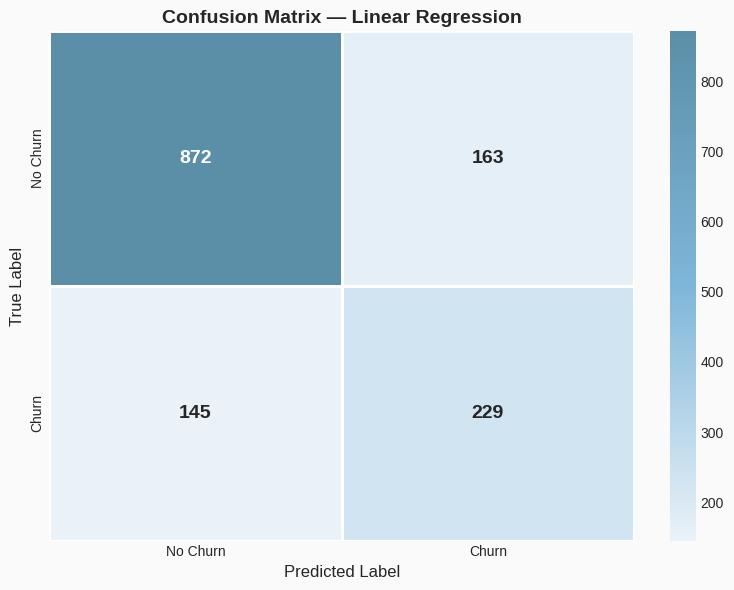

In [ ]:
# Evaluate
lr_results = evaluate_model(y_test, y_pred_lr, y_pred_lr_proba, "Linear Regression")
plot_confusion_matrix(y_test, y_pred_lr, "Linear Regression")

---
# MODEL 2: Logistic Regression

## Creating Logistic Regression Model

In [ ]:
# Train Logistic Regression model (with balanced class weights)
logistic_model = LogisticRegression(
    max_iter=1000, random_state=RANDOM_STATE, class_weight='balanced'
)
logistic_model.fit(X_train_scaled, y_train)

# Predict
y_pred_logistic = logistic_model.predict(X_test_scaled)
y_pred_logistic_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression model trained.")

Logistic Regression model trained.


## Evaluating Logistic Regression Model


Logistic Regression Evaluation
Accuracy:  0.7864
Precision: 0.6000
Recall:    0.5856
F1-Score:  0.5927
ROC-AUC:   0.8404


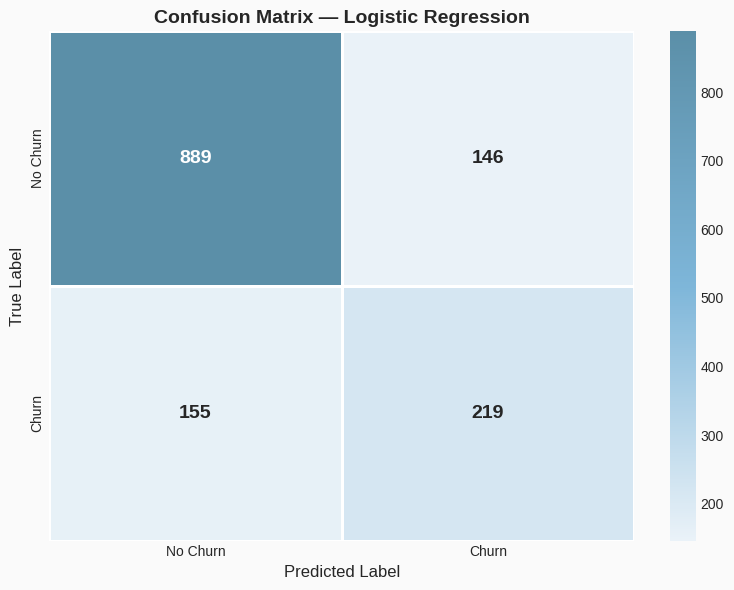

In [ ]:
# Evaluate
logistic_results = evaluate_model(y_test, y_pred_logistic, y_pred_logistic_proba, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_logistic, "Logistic Regression")

In [ ]:
# Feature importance from coefficients
feature_importance_lr = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logistic_model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nTop 10 Most Important Features (Logistic Regression):")
print(feature_importance_lr.head(10))


Top 10 Most Important Features (Logistic Regression):
                 Feature  Coefficient
4           ServiceCount    -7.165945
3      AvgMonthlyCharges    -2.586934
25   StreamingMovies_Yes     2.211565
23       StreamingTV_Yes     2.204700
11     MultipleLines_Yes     2.137017
19  DeviceProtection_Yes     1.896244
9       PhoneService_Yes     1.810664
17      OnlineBackup_Yes     1.797888
21       TechSupport_Yes     1.620464
15    OnlineSecurity_Yes     1.587969


---
# MODEL 3: Decision Tree

## Creating Decision Tree Model

In [ ]:
# Train Decision Tree model (no scaling needed)
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=20, random_state=RANDOM_STATE)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)
y_pred_dt_proba = dt_model.predict_proba(X_test)[:, 1]

print("Decision Tree model trained.")
print(f"Tree depth: {dt_model.get_depth()}")
print(f"Number of leaves: {dt_model.get_n_leaves()}")

Decision Tree model trained.
Tree depth: 10
Number of leaves: 255


## Evaluating Decision Tree Model


Decision Tree Evaluation
Accuracy:  0.7417
Precision: 0.5115
Recall:    0.5936
F1-Score:  0.5495
ROC-AUC:   0.7873


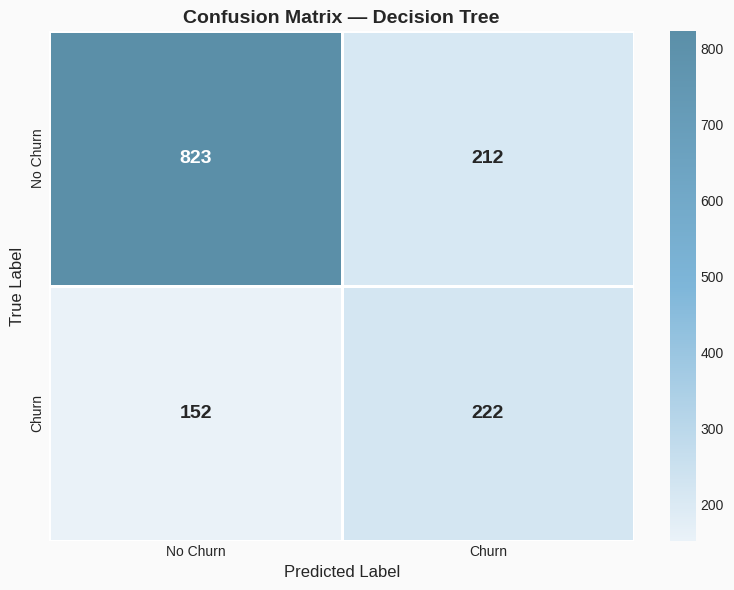

In [ ]:
# Evaluate
dt_results = evaluate_model(y_test, y_pred_dt, y_pred_dt_proba, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")


Top 10 Most Important Features (Decision Tree):
                                  Feature  Importance
30         PaymentMethod_Electronic check    0.347810
0                                  tenure    0.194020
12            InternetService_Fiber optic    0.072509
28                   PaperlessBilling_Yes    0.064294
2                            TotalCharges    0.057793
1                          MonthlyCharges    0.044475
3                       AvgMonthlyCharges    0.038288
29  PaymentMethod_Credit card (automatic)    0.026696
31             PaymentMethod_Mailed check    0.024316
9                        PhoneService_Yes    0.018839


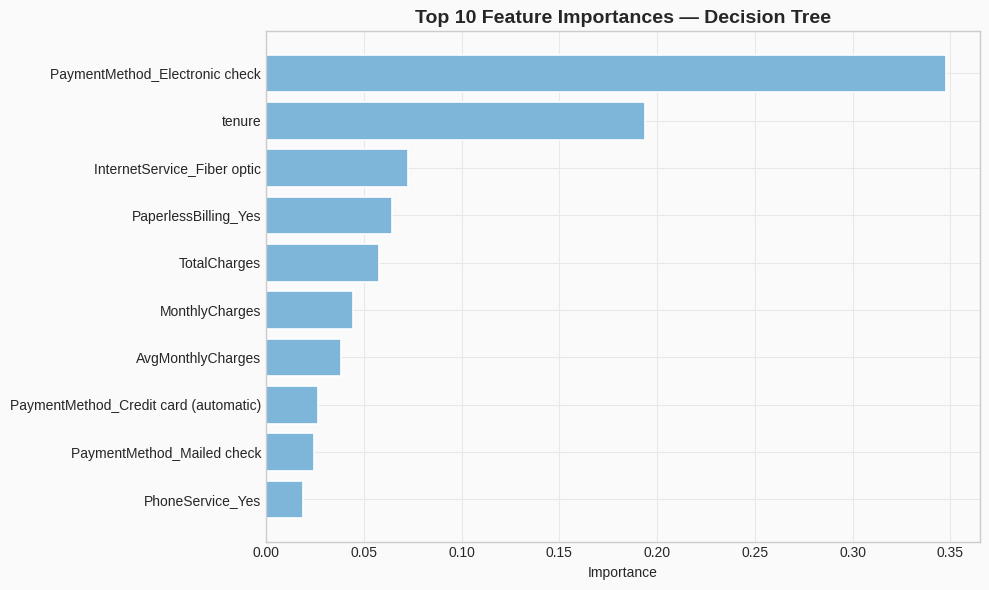

In [ ]:
# Feature importance from tree
feature_importance_dt = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Most Important Features (Decision Tree):")
print(feature_importance_dt.head(10))

# Visualize top features
fig, ax = plt.subplots(figsize=(10, 6))
top10 = feature_importance_dt.head(10)
bars = ax.barh(top10['Feature'], top10['Importance'],
               color=PASTEL_BLUE, edgecolor='white', linewidth=1.2)
ax.set_title('Top 10 Feature Importances — Decision Tree',
             fontsize=14, fontweight='bold')
ax.set_xlabel('Importance')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

---
# MODEL 4: Random Forest

## Creating Random Forest Model

In [ ]:
# Train Random Forest model (no scaling needed)
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    class_weight='balanced',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest model trained.")
print(f"Number of estimators: {rf_model.n_estimators}")

Random Forest model trained.
Number of estimators: 200


## Evaluating Random Forest Model


Random Forest Evaluation
Accuracy:  0.7800
Precision: 0.5755
Recall:    0.6524
F1-Score:  0.6115
ROC-AUC:   0.8323


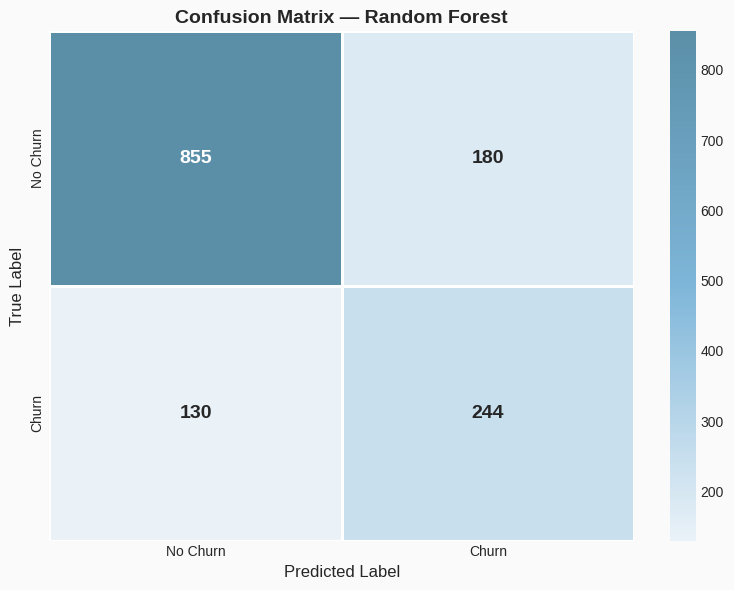

In [ ]:
# Evaluate
rf_results = evaluate_model(y_test, y_pred_rf, y_pred_rf_proba, "Random Forest")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")


Top 10 Most Important Features (Random Forest):
                           Feature  Importance
30  PaymentMethod_Electronic check    0.125865
0                           tenure    0.125107
2                     TotalCharges    0.118966
3                AvgMonthlyCharges    0.081395
1                   MonthlyCharges    0.076319
12     InternetService_Fiber optic    0.071854
28            PaperlessBilling_Yes    0.062280
27               Contract_Two year    0.042291
4                     ServiceCount    0.041265
6                SeniorCitizen_Yes    0.022400


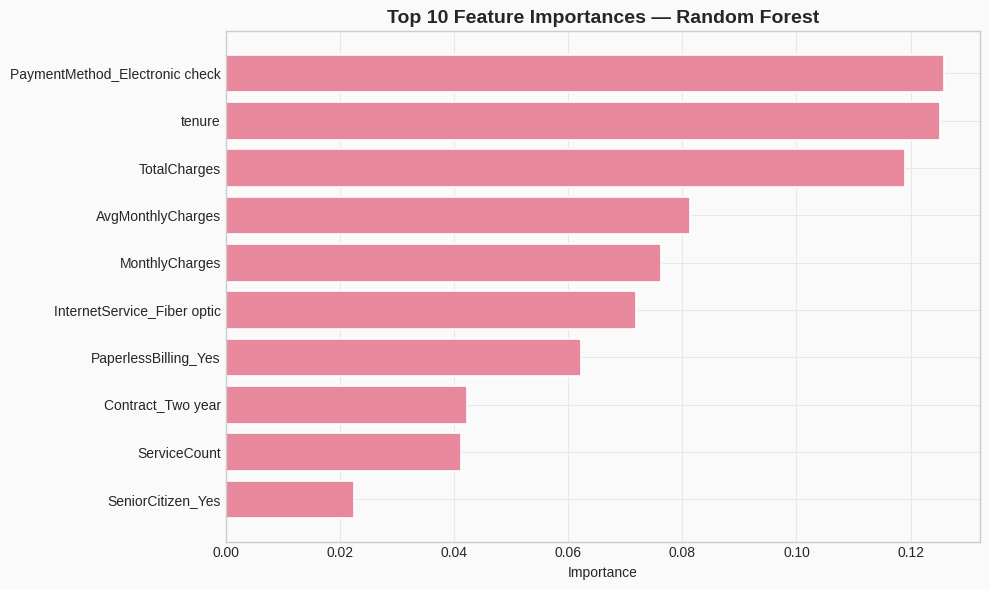

In [ ]:
# Feature importance from Random Forest
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Most Important Features (Random Forest):")
print(feature_importance_rf.head(10))

# Visualize top features
fig, ax = plt.subplots(figsize=(10, 6))
top10_rf = feature_importance_rf.head(10)
ax.barh(top10_rf['Feature'], top10_rf['Importance'],
        color=PASTEL_RED, edgecolor='white', linewidth=1.2)
ax.set_title('Top 10 Feature Importances — Random Forest',
             fontsize=14, fontweight='bold')
ax.set_xlabel('Importance')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

---
# MODEL 5: Single Layer Perceptron (SLP)

## Creating Single Layer Perceptron Model

In [ ]:
# Train Single Layer Perceptron
slp_model = Perceptron(max_iter=1000, tol=1e-3, random_state=RANDOM_STATE)
slp_model.fit(X_train_scaled, y_train)

# Predict
y_pred_slp = slp_model.predict(X_test_scaled)

# SLP doesn't have predict_proba, use decision function
y_pred_slp_scores = slp_model.decision_function(X_test_scaled)

print("Single Layer Perceptron model trained.")
print(f"Number of iterations: {slp_model.n_iter_}")

Single Layer Perceptron model trained.
Number of iterations: 7


## Evaluating Single Layer Perceptron Model


Single Layer Perceptron Evaluation
Accuracy:  0.7324
Precision: 0.4957
Recall:    0.4599
F1-Score:  0.4771


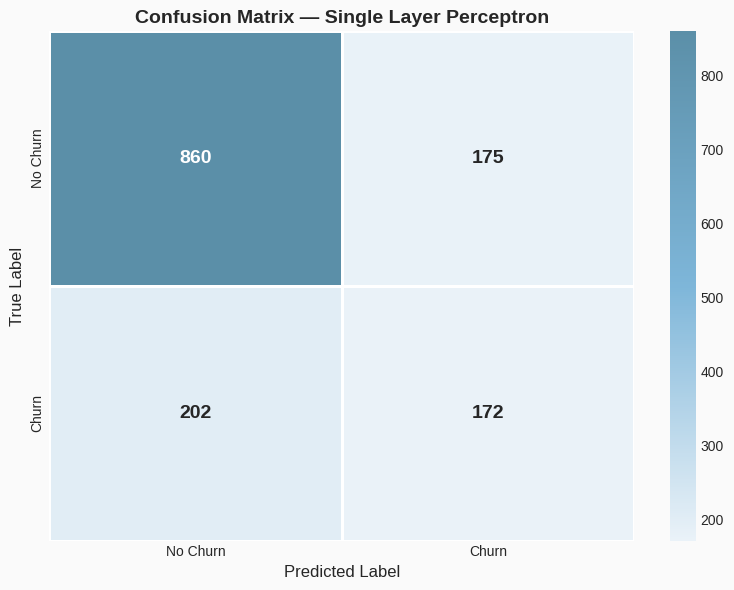

In [ ]:
# Evaluate (without ROC-AUC since no probabilities)
slp_results = evaluate_model(y_test, y_pred_slp, None, "Single Layer Perceptron")
plot_confusion_matrix(y_test, y_pred_slp, "Single Layer Perceptron")

---
# MODEL 6: Multi-Layer Perceptron (MLP)

## Creating Multi-Layer Perceptron Model

In [ ]:
# Train Multi-Layer Perceptron
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100, 50, 25),  # 3 hidden layers
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=RANDOM_STATE,
    early_stopping=True,
    validation_fraction=0.1
)
mlp_model.fit(X_train_scaled, y_train)

# Predict
y_pred_mlp = mlp_model.predict(X_test_scaled)
y_pred_mlp_proba = mlp_model.predict_proba(X_test_scaled)[:, 1]

print("Multi-Layer Perceptron model trained.")
print(f"Number of iterations: {mlp_model.n_iter_}")
print(f"Number of layers: {mlp_model.n_layers_}")

Multi-Layer Perceptron model trained.
Number of iterations: 17
Number of layers: 5


## Evaluating Multi-Layer Perceptron Model


Multi-Layer Perceptron Evaluation
Accuracy:  0.7722
Precision: 0.5710
Recall:    0.5695
F1-Score:  0.5703
ROC-AUC:   0.8216


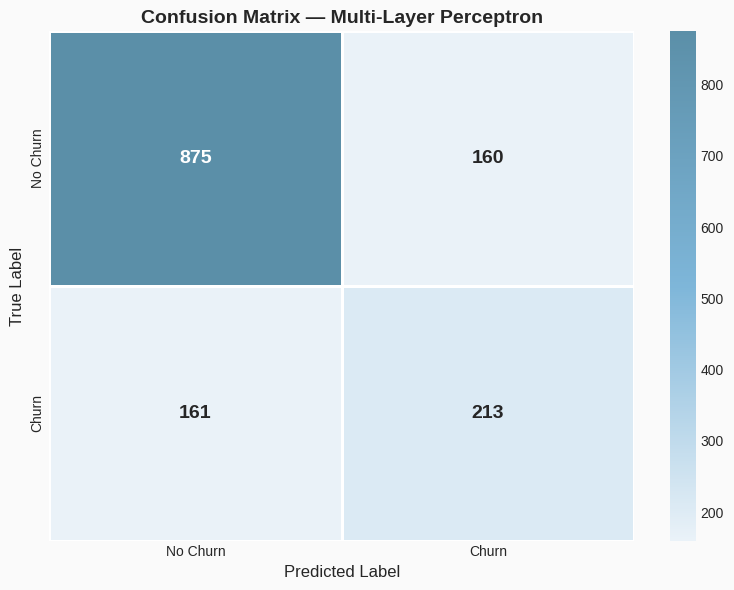

In [ ]:
# Evaluate
mlp_results = evaluate_model(y_test, y_pred_mlp, y_pred_mlp_proba, "Multi-Layer Perceptron")
plot_confusion_matrix(y_test, y_pred_mlp, "Multi-Layer Perceptron")

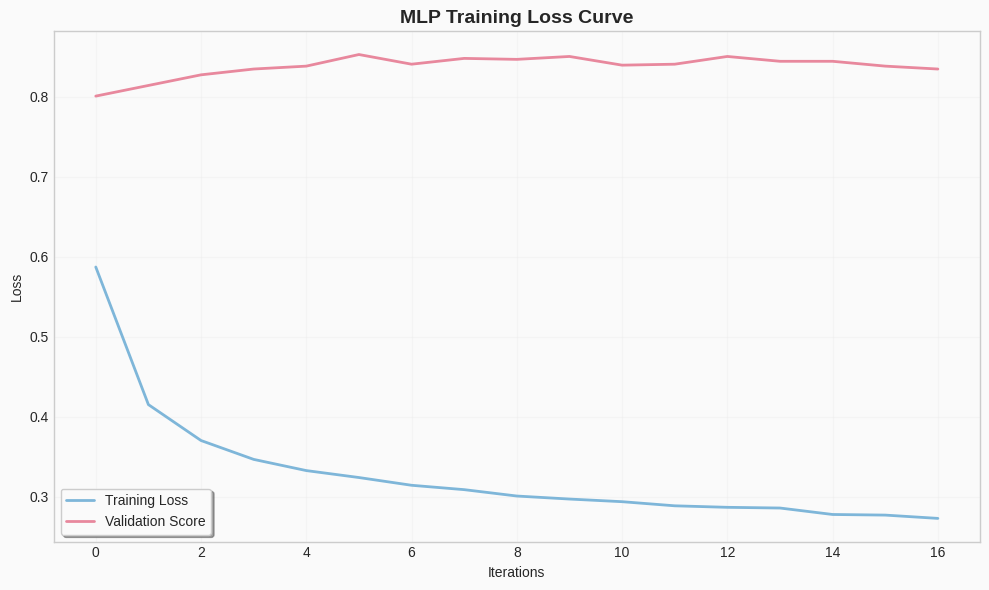

In [ ]:
# Plot loss curve
plt.figure(figsize=(10, 6))
plt.plot(mlp_model.loss_curve_, color=PASTEL_BLUE, linewidth=2, label='Training Loss')
if hasattr(mlp_model, 'validation_scores_') and mlp_model.validation_scores_ is not None:
    plt.plot(mlp_model.validation_scores_, color=PASTEL_RED, linewidth=2, label='Validation Score')
plt.title('MLP Training Loss Curve', fontsize=14, fontweight='bold')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---
# MODEL 7: TensorFlow Keras Sequential Dense Neural Network

## Building the Keras Model

In [ ]:
# Ensure checkpoint directory exists
os.makedirs('../models', exist_ok=True)

# Build Keras Sequential Dense Neural Network
n_features = X_train_scaled.shape[1]

keras_model = Sequential([
    # Input + Hidden Layer 1
    Dense(128, activation='relu', input_shape=(n_features,),
          kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.3),

    # Hidden Layer 2
    Dense(64, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.2),

    # Hidden Layer 3
    Dense(32, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.1),

    # Output Layer
    Dense(1, activation='sigmoid')
])

keras_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

keras_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,489 (60.50 KB)

 Trainable params: 15,041 (58.75 KB)

 Non-trainable params: 448 (1.75 KB)

## Training with Early Stopping & Model Checkpointing

In [ ]:
# # Callbacks
# early_stop = EarlyStopping(
#     monitor='val_loss',
#     patience=10,
#     restore_best_weights=True,
#     verbose=1
# )

checkpoint = ModelCheckpoint(
    './models/best_keras_churn_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Train
history = keras_model.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=64,
    validation_split=0.2,
    callbacks=[checkpoint],
    verbose=1
)

print(f"\nTraining completed in {len(history.history['loss'])} epochs.")

Epoch 1/200
 99/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6700 - loss: 0.6316
Epoch 1: val_loss improved from inf to 0.40393, saving model to ./models/best_keras_churn_model.keras
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6734 - loss: 0.6269 - val_accuracy: 0.8200 - val_loss: 0.4039
Epoch 2/200
 94/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7712 - loss: 0.4892
Epoch 2: val_loss improved from 0.40393 to 0.34762, saving model to ./models/best_keras_churn_model.keras
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7722 - loss: 0.4869 - val_accuracy: 0.8484 - val_loss: 0.3476
Epoch 3/200
 97/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7864 - loss: 0.4619
Epoch 3: val_loss improved from 0.34762 to 0.31309, saving model to ./models/best_keras_churn_model.keras
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7865 - loss: 0.4614 - val_accuracy: 0.8659 - val_loss: 0.3131
Epoch 4/200
102/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7945 - 

## Training & Validation Curves

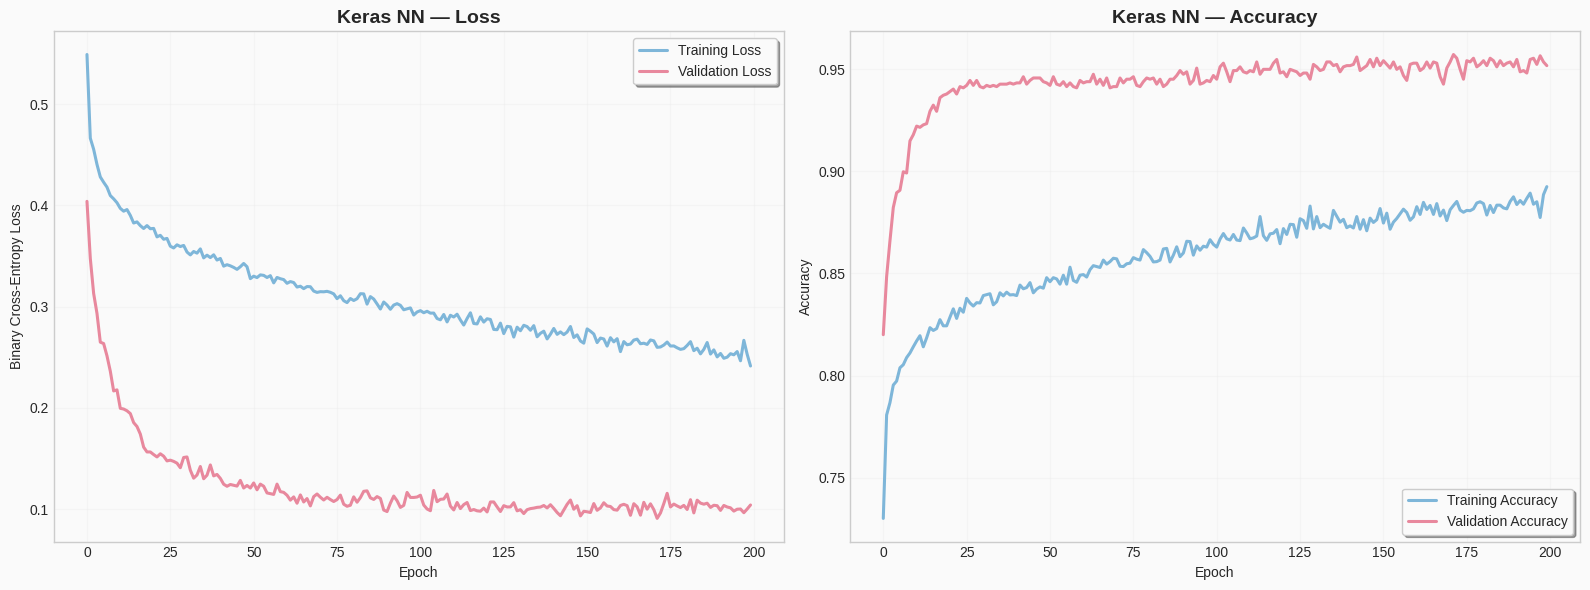

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ── Loss Curve ──
axes[0].plot(history.history['loss'],
             color=PASTEL_BLUE, linewidth=2.2, label='Training Loss')
axes[0].plot(history.history['val_loss'],
             color=PASTEL_RED, linewidth=2.2, label='Validation Loss')
axes[0].set_title('Keras NN — Loss', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Binary Cross-Entropy Loss')
axes[0].legend(frameon=True, fancybox=True, shadow=True)
axes[0].grid(True, alpha=0.3)

# ── Accuracy Curve ──
axes[1].plot(history.history['accuracy'],
             color=PASTEL_BLUE, linewidth=2.2, label='Training Accuracy')
axes[1].plot(history.history['val_accuracy'],
             color=PASTEL_RED, linewidth=2.2, label='Validation Accuracy')
axes[1].set_title('Keras NN — Accuracy', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(frameon=True, fancybox=True, shadow=True)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Evaluating Keras Neural Network


Keras Dense NN Evaluation
Accuracy:  0.7715
Precision: 0.5691
Recall:    0.5722
F1-Score:  0.5707
ROC-AUC:   0.8077


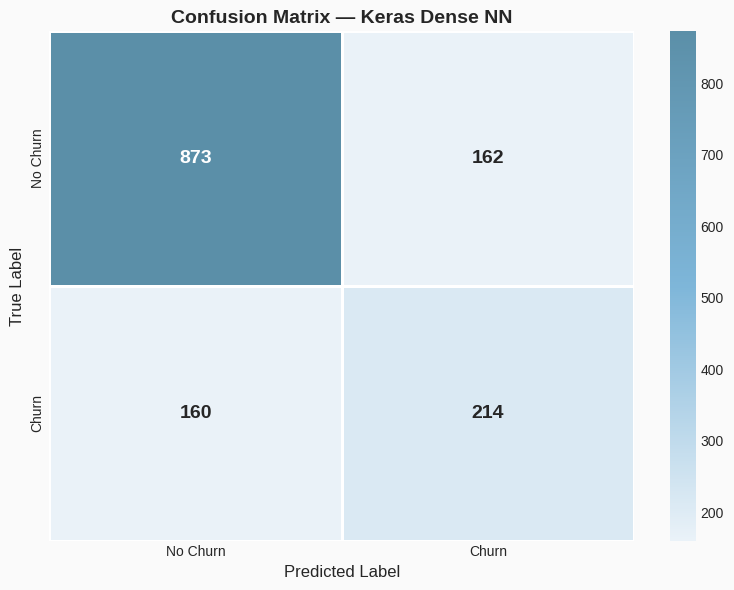


Detailed Classification Report:
              precision    recall  f1-score   support

    No Churn       0.85      0.84      0.84      1035
       Churn       0.57      0.57      0.57       374

    accuracy                           0.77      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.77      0.77      1409



In [ ]:
# Predict
y_pred_keras_proba = keras_model.predict(X_test_scaled, verbose=0).flatten()
y_pred_keras = (y_pred_keras_proba >= 0.5).astype(int)

# Evaluate
keras_results = evaluate_model(
    y_test, y_pred_keras, y_pred_keras_proba, "Keras Dense NN"
)
plot_confusion_matrix(y_test, y_pred_keras, "Keras Dense NN")

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_keras,
                            target_names=['No Churn', 'Churn']))

---
# Model Comparison & Analysis

## Performance Comparison Table

In [ ]:
# Compile all results
all_results = [
    lr_results, logistic_results, dt_results, rf_results,
    slp_results, mlp_results, keras_results
]
results_df = pd.DataFrame(all_results).round(4)

print("\n" + "="*90)
print("MODEL PERFORMANCE COMPARISON")
print("="*90)
print(results_df.to_string(index=False))
print("="*90)


MODEL PERFORMANCE COMPARISON
                  Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
      Linear Regression    0.7814     0.5842  0.6123    0.5979   0.8271
    Logistic Regression    0.7864     0.6000  0.5856    0.5927   0.8404
          Decision Tree    0.7417     0.5115  0.5936    0.5495   0.7873
          Random Forest    0.7800     0.5755  0.6524    0.6115   0.8323
Single Layer Perceptron    0.7324     0.4957  0.4599    0.4771      NaN
 Multi-Layer Perceptron    0.7722     0.5710  0.5695    0.5703   0.8216
         Keras Dense NN    0.7715     0.5691  0.5722    0.5707   0.8077


In [ ]:
# ── Styled Comparison Table ──
def highlight_best(s):
    """Highlight the maximum value in each numeric column."""
    if s.dtype in ['float64', 'float32']:
        is_max = s == s.max()
        return ['background-color: #D4EDDA; font-weight: bold' if v else '' for v in is_max]
    return ['' for _ in s]

styled_table = (results_df.style
    .apply(highlight_best, axis=0)
    .format({
        'Accuracy':  '{:.4f}',
        'Precision': '{:.4f}',
        'Recall':    '{:.4f}',
        'F1-Score':  '{:.4f}',
        'ROC-AUC':   '{:.4f}'
    }, na_rep='N/A')
    .set_caption('Model Performance Comparison — Customer Churn Prediction')
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '16px'),
                                           ('font-weight', 'bold'),
                                           ('text-align', 'center'),
                                           ('margin-bottom', '10px')]},
        {'selector': 'th', 'props': [('background-color', PASTEL_BLUE),
                                      ('color', 'white'),
                                      ('font-weight', 'bold'),
                                      ('text-align', 'center'),
                                      ('padding', '8px')]},
        {'selector': 'td', 'props': [('text-align', 'center'),
                                      ('padding', '6px')]},
    ])
)

styled_table

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Linear Regression,0.7814,0.5842,0.6123,0.5979,0.8271
1,Logistic Regression,0.7864,0.6000,0.5856,0.5927,0.8404
2,Decision Tree,0.7417,0.5115,0.5936,0.5495,0.7873
3,Random Forest,0.7800,0.5755,0.6524,0.6115,0.8323
4,Single Layer Perceptron,0.7324,0.4957,0.4599,0.4771,N/A
5,Multi-Layer Perceptron,0.7722,0.5710,0.5695,0.5703,0.8216
6,Keras Dense NN,0.7715,0.5691,0.5722,0.5707,0.8077


## Visual Metrics Comparison

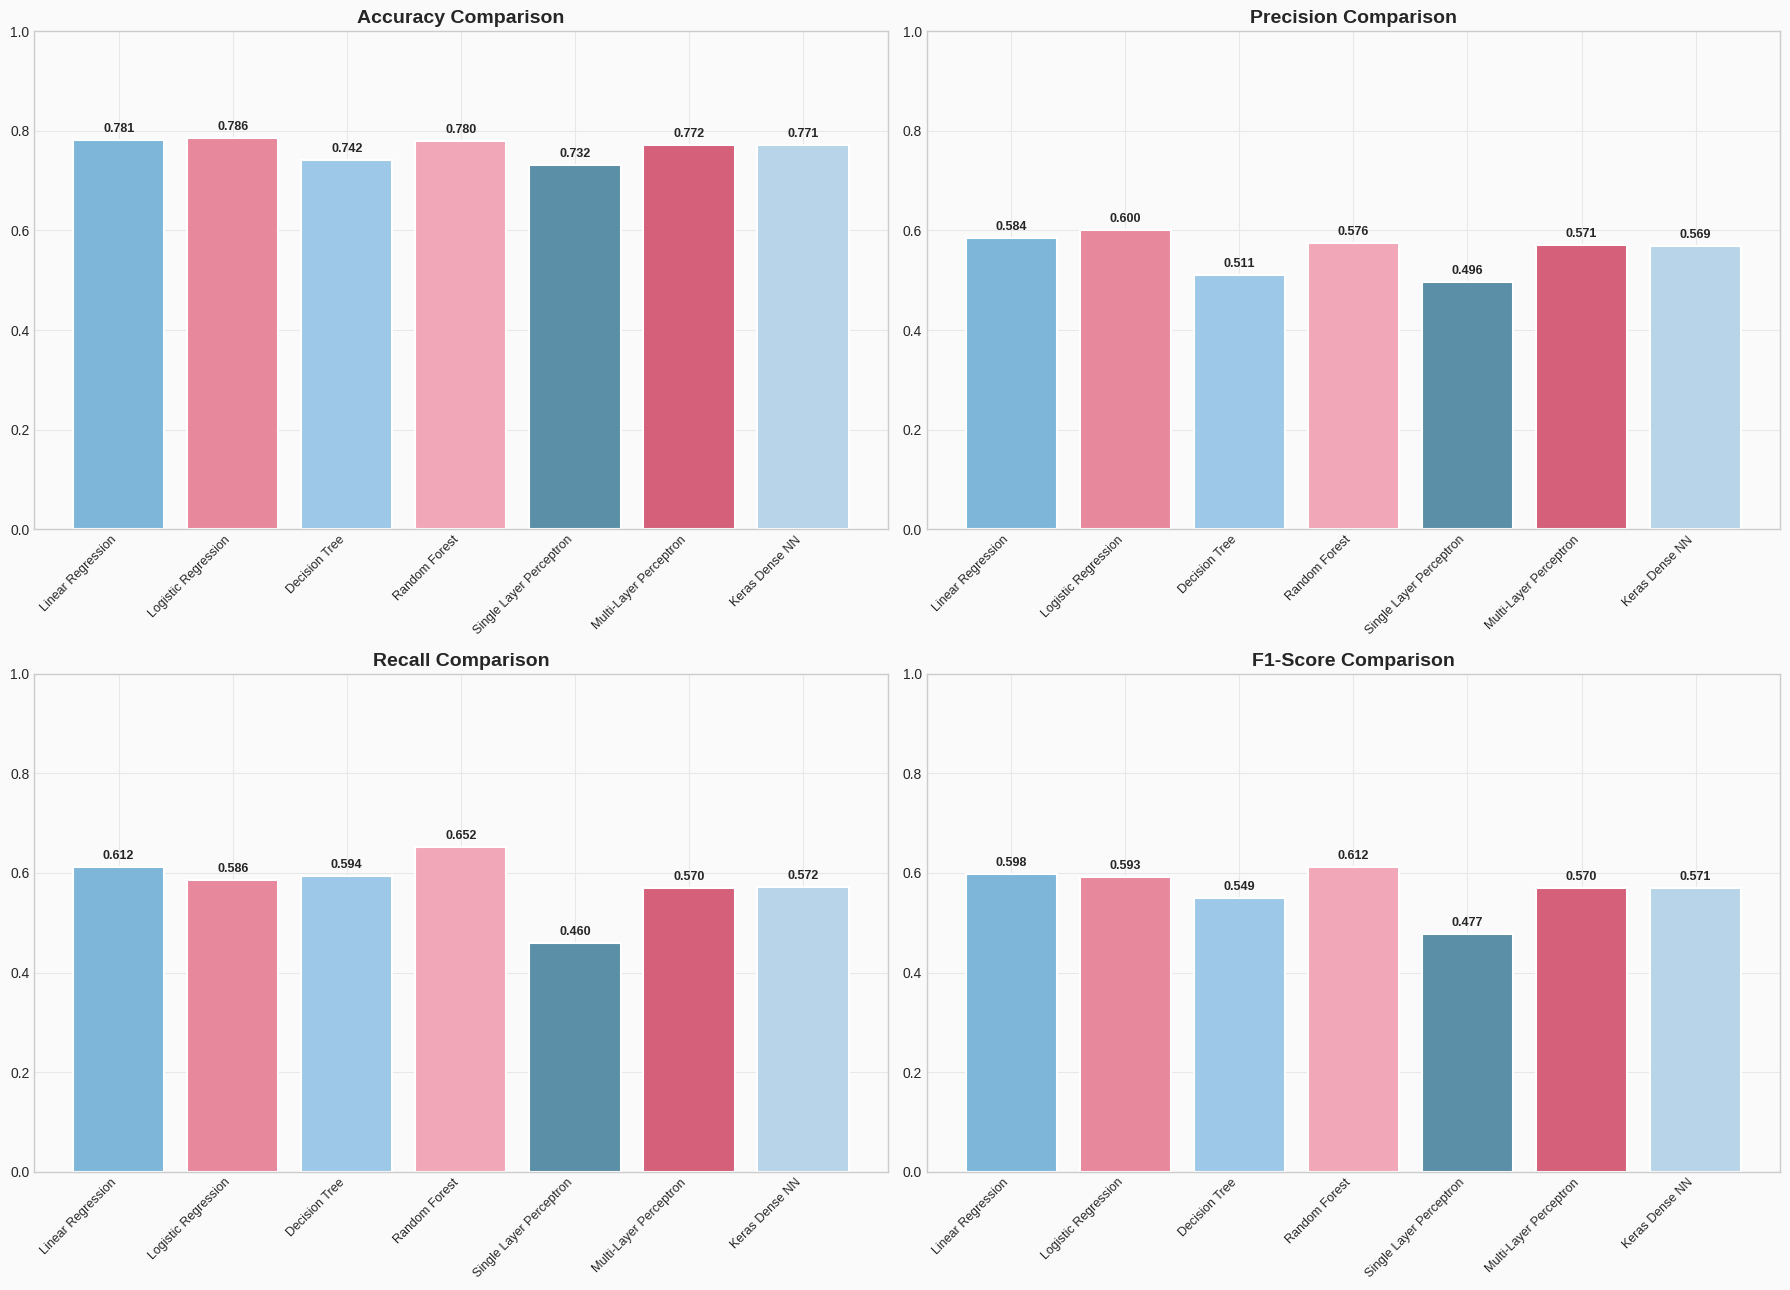

In [ ]:
# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(18, 13))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    bars = ax.bar(results_df['Model'], results_df[metric],
                  color=MODEL_PALETTE[:len(results_df)],
                  edgecolor='white', linewidth=1.5)
    ax.set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    ax.set_ylim([0, 1])
    ax.set_xticklabels(results_df['Model'], rotation=45, ha='right', fontsize=9)

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom',
                fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

## ROC Curve Comparison

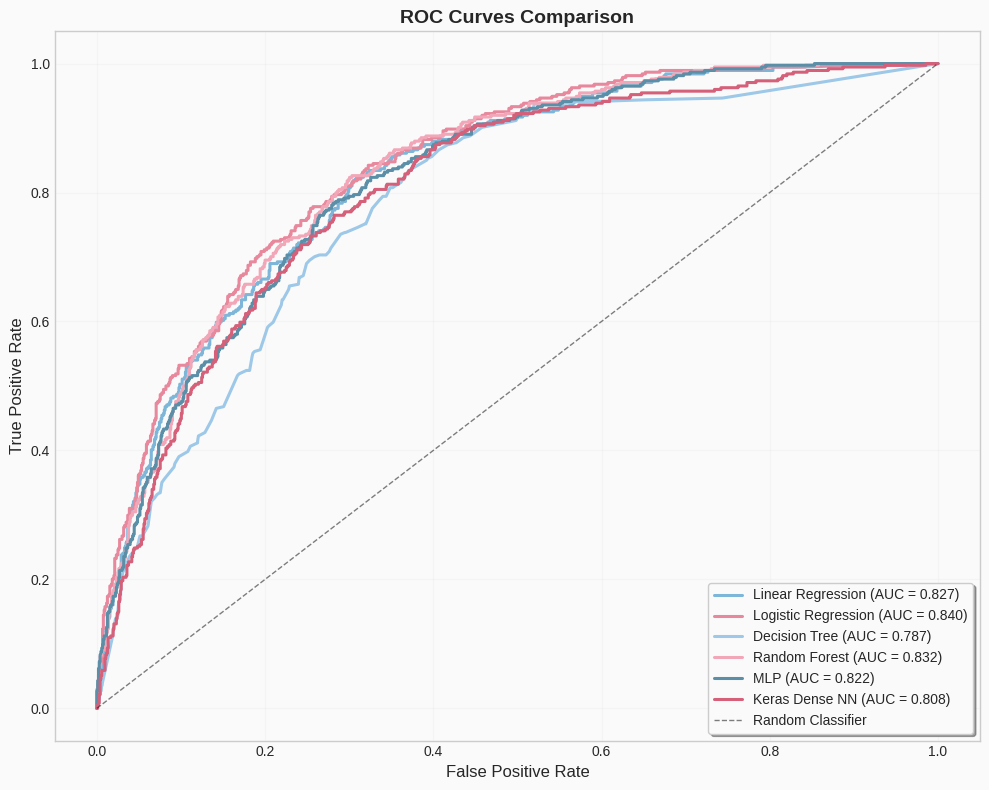

In [ ]:
# Plot ROC curves for models with probability predictions
plt.figure(figsize=(10, 8))

roc_data = [
    (y_pred_lr_proba,       lr_results,       'Linear Regression'),
    (y_pred_logistic_proba, logistic_results,  'Logistic Regression'),
    (y_pred_dt_proba,       dt_results,        'Decision Tree'),
    (y_pred_rf_proba,       rf_results,        'Random Forest'),
    (y_pred_mlp_proba,      mlp_results,       'MLP'),
    (y_pred_keras_proba,    keras_results,      'Keras Dense NN'),
]

for i, (proba, res, name) in enumerate(roc_data):
    fpr, tpr, _ = roc_curve(y_test, proba)
    auc_val = res['ROC-AUC']
    plt.plot(fpr, tpr, color=MODEL_PALETTE[i], linewidth=2.2,
             label=f"{name} (AUC = {auc_val:.3f})")

# Diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier', alpha=0.5)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', frameon=True, fancybox=True, shadow=True)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Key Insights and Churn Drivers

In [ ]:
print("\n" + "="*80)
print("KEY CHURN DRIVERS (from Random Forest Feature Importance)")
print("="*80)
print(feature_importance_rf.head(15).to_string(index=False))
print("="*80)


KEY CHURN DRIVERS (from Random Forest Feature Importance)
                       Feature  Importance
PaymentMethod_Electronic check    0.125865
                        tenure    0.125107
                  TotalCharges    0.118966
             AvgMonthlyCharges    0.081395
                MonthlyCharges    0.076319
   InternetService_Fiber optic    0.071854
          PaperlessBilling_Yes    0.062280
             Contract_Two year    0.042291
                  ServiceCount    0.041265
             SeniorCitizen_Yes    0.022400
             MultipleLines_Yes    0.021355
             Contract_One year    0.017442
           StreamingMovies_Yes    0.016375
                   gender_Male    0.015550
               StreamingTV_Yes    0.015071


## Summary & Recommendations

In [ ]:
print("\n" + "="*80)
print("SUMMARY & RECOMMENDATIONS")
print("="*80)

best_model = results_df.loc[results_df['F1-Score'].idxmax(), 'Model']
best_f1 = results_df['F1-Score'].max()

# Best ROC-AUC (exclude NaN)
roc_df = results_df.dropna(subset=['ROC-AUC'])
best_auc_model = roc_df.loc[roc_df['ROC-AUC'].idxmax(), 'Model']
best_auc = roc_df['ROC-AUC'].max()

print(f"\n1. BEST F1-SCORE MODEL:  {best_model}")
print(f"   - F1-Score: {best_f1:.4f}")
print(f"   - Best balance between precision and recall.")

print(f"\n2. BEST ROC-AUC MODEL:   {best_auc_model}")
print(f"   - ROC-AUC: {best_auc:.4f}")
print(f"   - Best overall discrimination ability.")

print("\n3. KEY CHURN DRIVERS:")
top_features = feature_importance_rf.head(5)['Feature'].tolist()
for i, feat in enumerate(top_features, 1):
    print(f"   {i}. {feat}")

print("\n4. BUSINESS RECOMMENDATIONS:")
print("   - Focus on customers with short tenure (higher churn risk)")
print("   - Offer incentives for longer contract commitments")
print("   - Provide better support for Fiber optic customers")
print("   - Monitor customers with month-to-month contracts closely")
print("   - Implement retention campaigns for high monthly charge customers")

print("="*80)


SUMMARY & RECOMMENDATIONS

1. BEST F1-SCORE MODEL:  Random Forest
   - F1-Score: 0.6115
   - Best balance between precision and recall.

2. BEST ROC-AUC MODEL:   Logistic Regression
   - ROC-AUC: 0.8404
   - Best overall discrimination ability.

3. KEY CHURN DRIVERS:
   1. PaymentMethod_Electronic check
   2. tenure
   3. TotalCharges
   4. AvgMonthlyCharges
   5. MonthlyCharges

4. BUSINESS RECOMMENDATIONS:
   - Focus on customers with short tenure (higher churn risk)
   - Offer incentives for longer contract commitments
   - Provide better support for Fiber optic customers
   - Monitor customers with month-to-month contracts closely
   - Implement retention campaigns for high monthly charge customers


## Save Models (Optional)

In [ ]:
# Uncomment to save models
import joblib
os.makedirs('./models', exist_ok=True)
joblib.dump(logistic_model, './models/logistic_regression.pkl')
joblib.dump(dt_model, './models/decision_tree.pkl')
joblib.dump(rf_model, './models/random_forest.pkl')
joblib.dump(mlp_model, './models/mlp.pkl')
keras_model.save('./models/keras_dense_nn.keras')
print("Models saved successfully!")

Models saved successfully!


In [ ]:
import os

current_directory = os.getcwd()
print(current_directory)

/content
